                                                                Project Code
Code Summary: This code is used to help students record their monthly income and expenses. For clarity, the code has been divided in multiple notbook cells, each representing an important section for the final result. The first section represents the definition of the first class, namely the income class, which contains all the income elements as attributes. The second section includes the definition of the second class, which will help handle the expenses. The third class is the biggest, and it contains methods that perform the actions described in the project's presentation. This class includes important elements such as a bubble sort algorithm, a linear search, methods for creating visualisations, and an option to export the data to excel, so the student can analyse it further, if they wish. The last section is the main function - which calls the methods and allows for an interactive way of recording data from the student's side, so there is no need for them to write code. The errors are handled in this part using try and except blocks, while the class definitions validate the input and raise exceptions when something is wrong: for example, the student enters a negative value for SU. This error handling part ensures the code doesn't crash and can continue in case an error pops up. 

To make this code easier to understand, each section will have a markdown explaining its functionality in more detail. I thought this would be easier than writing long comments accross the code. Of course, all this information is available in the project report, but was included here to accompany the code. Comments will only be included where I thought some methods need a few extra words 


In [7]:
#As stated in the report, the code will make use of two external libraries: myplotlib for creating visualisations and pandas for data management. 
#The code will not run if the two are not installed, so one can use pip install pandas and pip install matplotlib to check if the requirement is satisfied
#If the code is run on Jupyter - there should be no need to install these, but if the code is run in fx. Visual Studio Code, please make sure to have them installed

import pandas as pd
import matplotlib.pyplot as plt

This is the first class of the program, the income. First, a class constant is defined for warning the student in case their minimum wage is below what is recommended in denmark. 

An instance of this class would represent the detailed income information for a specific month, as the class attributes are the income components.Given that the student may accidentally type in wrong inputs, the classes ensure that these inputs are validatedr, and an exception is risen if something is wrong - which will be handled in the main() function.This class has a constructor and two methods: one for determining the spendable income, and one to help print clas objects further. 

In [8]:
class Income:
    MIN_HOURLY_WAGE = 120 

    def __init__(self,current_month, su_amount, hours_worked, hourly_wage, other_income, tax_paid ):
        self.current_month= current_month

        for value in [ su_amount,hours_worked, hourly_wage,other_income, tax_paid]:
            if not isinstance(value,(int, float)):
                raise ValueError('You introduced an invalid value for: {} All inputs need to be numbers'.format(name))
        if su_amount<0:
            raise ValueError('The SU amount cannot be negative, but can be 0 you do not get SU')
        self.su_amount=su_amount
        if hours_worked<0:
            raise ValueError("The number of hours worked must be non-negative, but can be 0")
        self.hours_worked=hours_worked
        if hourly_wage<Income.MIN_HOURLY_WAGE:
            print("Warning: Your hourly wage seems lower than recommended. You could consider discussing this with a union :) ")
        if hourly_wage<0:
            raise ValueError('The hourly wage should be non-negative')
        self.hourly_wage = hourly_wage
        if other_income<0:
            raise ValueError("The income from other sources cannot be negative")
        self.other_income = other_income
        if tax_paid<0:
            raise ValueError("The amount of tax paid cannot be negative")
        self.tax_paid = tax_paid

    def spendable_income_calculation(self):
        monthly_income =self.su_amount + (self.hours_worked*self.hourly_wage)+self.other_income
        spendable_income = monthly_income- self.tax_paid
        #print(monthly_income,spendable_income)
        return monthly_income, spendable_income
    
    def __str__(self):
        monthly_income, spendable_income = self.spendable_income_calculation()
        return "For the month of: {}, the Monthly income has a value of : {} DKK, while the Spendable income has a value of: {} DKK".format(self.current_month, monthly_income, spendable_income)

This is the expense class, and an object of this class is simply an individual monthly expense, like the rent for January. Here I have thought of potential errors the student could make - and what we need to be careful is that the description and categories are strings (which it should be clear in general, but I still included them for safety), and that the amount has to be a non-negative number.

In [9]:
class Expense:
    def __init__(self, current_month, description, amount, category):
        if not isinstance(current_month,str) or not current_month.strip():
            raise ValueError('The name of the month has to be a string')
        if not all(isinstance(n,str) and n.strip() for n in[description,category]):
            raise ValueError('Description and category shall be non-empty strings')
        if not isinstance(amount,(int,float)) or amount <0:
            raise ValueError('The expense amount has to be a non-negative number' )
     
        self.current_month=current_month
        self.description=description
        self.amount=amount
        self.category=category

    def __str__(self):
        return "In the month of {}, the specific expense is {}, amounting {} DKK, and belonging to the category {}".format(self.current_month, self.description, self.amount, self.category)

The third class is the most complex of the three, because it contains more methods which help manage the data. An object of this class contains financial information for more months. The data is organised in two lists, one which stores all the incomes, and the same for expenses. I have chosen to work with lists because they are mutable and because it is easy to perform a large variety of operations on them. Then a bubble sort algorithm is implemented to help sort expenses in descending order - this is seen as hepful because then the student can see which are their biggest expenses. The logic of the bubble algorithm is simple: it goes through the list multiple times, compares the amounts of 2 consecutive expenses and if the one on the right is bigger than the one on the left-they swap places. after multiple iterations, I print out the sorted list. The visualisations needed extra data management before - i used pandas to be able to group expenses so I can make a pie chart, and an additional method to get the expenes an incomes in a form that a line chart with 2 lines can be created. There is also a simple option to export data to excel - where I created another dataframe with all data, and used a list of dictionaries for it, to make sure I don't make mistakes in the order. There is also a linear search algorithm, with a little twitch becuse instead of stopping when a match is found - I try to find all matches and store them in a list - again a list because they are simple to use.

In [10]:
class ExpenseManagement:
    def __init__(self):
        self.all_incomes = [] 
        self.all_expenses=[] 
    
    #I use this to create instances of the class income - I call this in main() to pass it on the studen's inputs 
    def register_income(self, current_month, su_amount, hours_worked, hourly_wage, other_income, tax_paid):
            income = Income(current_month, su_amount, hours_worked, hourly_wage, other_income, tax_paid )
            self.all_incomes.append(income)

    #same as above but for expenses 
    def register_expense(self, current_month, description, amount, category):
            individual_expense = Expense(current_month, description, amount, category)
            self.all_expenses.append(individual_expense)
    

    def bubble_sort_the_expenses_by_amount(self, current_month):
        monthly_expenses=[expense for expense in self.all_expenses if expense.current_month.lower() == current_month.lower()] 

        n=len(monthly_expenses)
        for i in range(n):
            for j in range(0,n-i-1):
                if monthly_expenses[j].amount < monthly_expenses[j+1].amount: 
                    monthly_expenses[j], monthly_expenses[j+1]=monthly_expenses[j+1], monthly_expenses[j]

        print('\nHere are the expenses for the month {} sorted by their amount in descending order:'.format(current_month))
        
        for individual_expense in monthly_expenses:
            print('Expense for the month {}, Description: {}, Amount: {} DKK, Category it belongs to: {}'.format(individual_expense.current_month, individual_expense.description, individual_expense.amount, individual_expense.category))

    #this will help the student type in a caegory and get all monthly expenses from that category 
    def linear_search_expenses_by_category(self, current_month, category):
        expenses_that_match=[]
        for i in range(len(self.all_expenses)):
            individual_expense=self.all_expenses[i]
            if individual_expense.current_month.lower()==current_month.lower() and individual_expense.category.lower()==category.lower():
                expenses_that_match.append(individual_expense)
        #print(expenses_that_match)

        if expenses_that_match:
            print('\n The expenses in the category "{}" for the month {} are: '.format(category, current_month))
            for individual_expense in expenses_that_match:
                print('The category of the expense: {}, Description: {}, Amount: {} DKK'.format(individual_expense.category, individual_expense.description, individual_expense.amount))
        else:
            print('\n There were no expenses belonging to the category "{}" in the month of {}'.format(category, current_month))

    
    def pie_chart(self, current_month):
        monthly_expenses =[individual_expense for individual_expense in self.all_expenses if individual_expense.current_month.lower()==current_month.lower()]

        if not monthly_expenses:
            print('Unfortunately, no expense was recorded in the month {}. The pie chart cannot be created'.format(current_month))
            return

        #I create a pandas dataframe to easily group expenses - without this the pie chart is hard to generate   
        expense_data=[[individual_expense.category, individual_expense.amount] for individual_expense in monthly_expenses]
        df=pd.DataFrame(expense_data, columns=['Category', 'Amount'])
        category_totals =df.groupby('Category')['Amount'].sum()

        #print(df.head())
        
        #category_totals.head()

        
        plt.pie(category_totals, labels = category_totals.index, autopct = '%1.1f%%', pctdistance=0.75)
        plt.title("The Expense Overview for the month {}: ".format(current_month))
        plt.show()

    #this is like a helper method for the line chart - the end goal is to get 2 lists: one with all incomes and one with the sum of all expenses
    #the hard part here is that each item in each list has to follow the order of the months, so I thought the easiest is to create a month list and use that
    def getting_monthly_totals(self):
        income_by_month = [0]*12
        expenses_by_month= [0]*12

        all_months_in_a_year=['January', 'February','March','April','May','June','July', 'August','September','October','November','December' ]

        for individual_income in self.all_incomes:
                month_index=all_months_in_a_year.index(individual_income.current_month.strip().capitalize())
                income_by_month[month_index]= individual_income.spendable_income_calculation()[1] 
           
        for individual_expense in self.all_expenses:
                month_index = all_months_in_a_year.index(individual_expense.current_month.strip().capitalize())
                expenses_by_month[month_index] +=  individual_expense.amount
        #print(income_by_month)  
        return income_by_month, expenses_by_month
    
    def line_chart(self):
        income_by_month, expenses_by_month = self.getting_monthly_totals()
     
        plt.plot(range(1,13), income_by_month, label = "Spendable Income", marker = 'o')
        plt.plot(range(1,13),expenses_by_month, label = "Total Expenses", marker='o')
        
        plt.title('Total Income and Expenses Over time - Until the Current Month')
        plt.xlabel('Month')
        plt.ylabel('Amount in DKK')
        plt.legend()
        plt.grid()
        plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar','Apr','May','Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec'])
        plt.show()   

    def excel_export(self):
        all_data = []
        for income in self.all_incomes:
            monthly_income, spendable_income = income.spendable_income_calculation()
            all_data.append({'Type':'Income', 'Month':income.current_month, 'SU':income.su_amount, 'Worked Hours': income.hours_worked, 'Hourly_wage':income.hourly_wage, 'Add. income':income.other_income, 'Taxes':income.tax_paid, 'Monthly Income':monthly_income, 'Spendable Income': spendable_income, 'Description': None, 'Expense_amount':None, 'Category':None})

        for expense in self.all_expenses:
            all_data.append({'Type': 'Expense', 'Month': expense.current_month, 'SU': None, 'Worked Hours':None,'Hourly_wage':None,'Add. income':None, 'Taxes':None, 'Monthly Income':None, 'Spendable Income': None, 'Description': expense.description, 'Expense_amount': expense.amount, 'Category': expense.category})

        df2=pd.DataFrame(all_data, columns=['Type', 'Month', 'SU', 'Worked Hours', 'Hourly_wage','Add. income','Taxes','Monthly Income','Spendable Income', 'Description','Expense_amount','Category'])                 
        #print(df2.head())


        while True:
            path_for_excel_file = input('Enter the file path where you would like the excel file to be saved. Please follow this example: C:\\\\Users\\\\Name\\\\Desktop\\\\Income_and_expenses.xlsx, including the exact number of backlashes. Note: Name is the username you have for your computer: ').strip()
            try:
                df2.to_excel(path_for_excel_file, index=False)
                print('Your file has been created and the data should be available at {}'.format(path_for_excel_file))
                break
            except ValueError as error:
                print('There was an error in saving your excel file: {}'.format(error))

Lastly, a main function was needed for creating an interactive medium for the user - it would be to difficult to have to create instances of classes manually, especially for the expense part. The main function creates an instance of the third class, so all the methods in it can be used. The student first enters the month - if they do it wrong, they get an error and until they introduce a valid name like january or January. after that, they input income details, whcih again have to be valid, then expenses - this function calls the methods in the class above to generate objects of the classes. then it calls all of the other methods discuss above, on these objects - sorting, searching, visualisation creation. the main() makes it very easy to just click run and then every method is called automatically.

In [11]:
#The Main Function of the Program 
def main():
    exp_management = ExpenseManagement() 
    months=['January', 'February', 'March','April', 'May', 'June','July','August','September','October','November','December']
    
    while True:
        current_month = input("Enter the month you want to work with. Example: Enter 'January' or type 'quit' to exit:").capitalize()
        if current_month.lower()== 'quit':
            print('The execution of the program has finished. Thank you for trying it! :)')
            break
        if current_month not in months:
            print('Ups, you entered a wrong month name, please try again and ensure your month is written like February')
            continue
        print('Entering the data for the month: {} '.format(current_month))

        while True:
            try:
                su_amount = float(input("Enter how much you are earning in SU. Write 0 if you don't get SU: "))
                hours_worked = float(input('Enter how many hours you worked this month. Write 0 if none:'))
                hourly_wage=float(input('Please enter your hourly wage, before taxes. Enter 0 if none: '))
                other_income=float(input('Enter any income you got from other sources, fx. parents. Write 0 if none: '))
                tax_paid=float(input ('Enter the amount you paid in taxes this month. Write 0 if none: '))
                exp_management.register_income(current_month, su_amount, hours_worked, hourly_wage,other_income,tax_paid)
                break
            except ValueError as error:
                print("There was an error: {}".format(error))     

        while True:
            add_expense = input('Do you want to add an expense for this month? Type either y or n:').lower()
            if add_expense =='n':
                break
            elif add_expense=='y':
                while True:
                    
                    try:
                        description = input('Enter the expense description. fx: movies with friends')
                        amount=float(input('Enter the expense amount:'))
                        category=input('Enter the category the expense belongs to. Fx: rent, utilities: ')
                        exp_management.register_expense(current_month,description,amount, category)
                        break
                    except ValueError as error:
                        print('An error has unfortunately occurred: {}'.format(error))
            else:
                print('Please type either y for "yes" or n for "no" here')

       
        exp_management.bubble_sort_the_expenses_by_amount(current_month) 

      
        category=input('You can search expenses by category. Please enter the category for which you want to search the expenses')
        exp_management.linear_search_expenses_by_category(current_month,category)

        
        #Visualisations
        exp_management.pie_chart(current_month)
        exp_management.line_chart()

        #Excel saving
        want_export=input('Do you want to export your data as an Excel file? Type y for yes or n for no:').strip().lower()
        if want_export=='y':
            exp_management.excel_export()

Entering the data for the month: January 

Here are the expenses for the month January sorted by their amount in descending order:

 There were no expenses belonging to the category "n" in the month of January
Unfortunately, no expense was recorded in the month January. The pie chart cannot be created


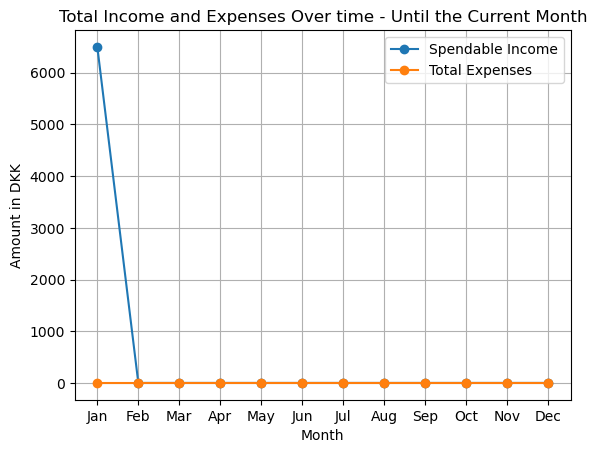

The execution of the program has finished. Thank you for trying it! :)


In [12]:
#Calling the main function
main()